In [1]:
#Importing all required functions 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
#Creating NetFlix DataFrame by first copying exact path and then using pandas 
netflix_df = pd.read_csv(r"C:\Users\arman\OneDrive\Documents\PURDUE\Python Programming\HWs\NetFlix Data Stuff Hw 5\netflix_titles.csv")
movies_df = pd.DataFrame(netflix_df)
movies_df_clean = movies_df.fillna('Information Not Provided')
movies_df_clean.head() #Displaying to see if data imported correctly 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Information Not Provided,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Information Not Provided,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Information Not Provided,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Information Not Provided,Information Not Provided,Information Not Provided,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Information Not Provided,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


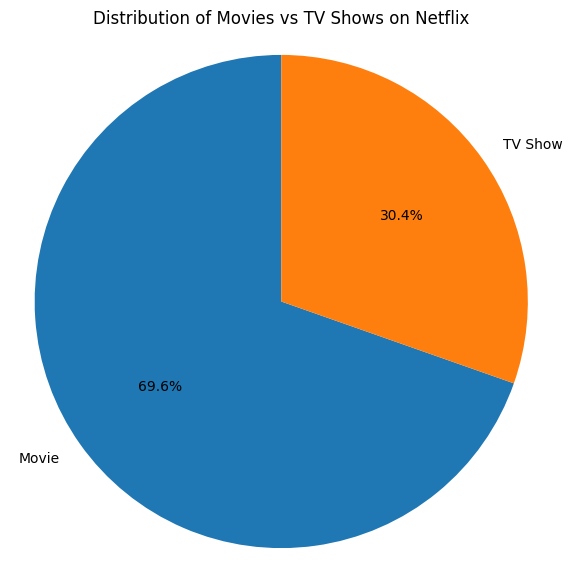

In [3]:
#Counting the number of Movies and TV Shows
type_counts = movies_df_clean['type'].value_counts()

#Creating labels for the pie chart
labels = type_counts.index

plt.figure(figsize=(7, 7)) 
plt.pie(type_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

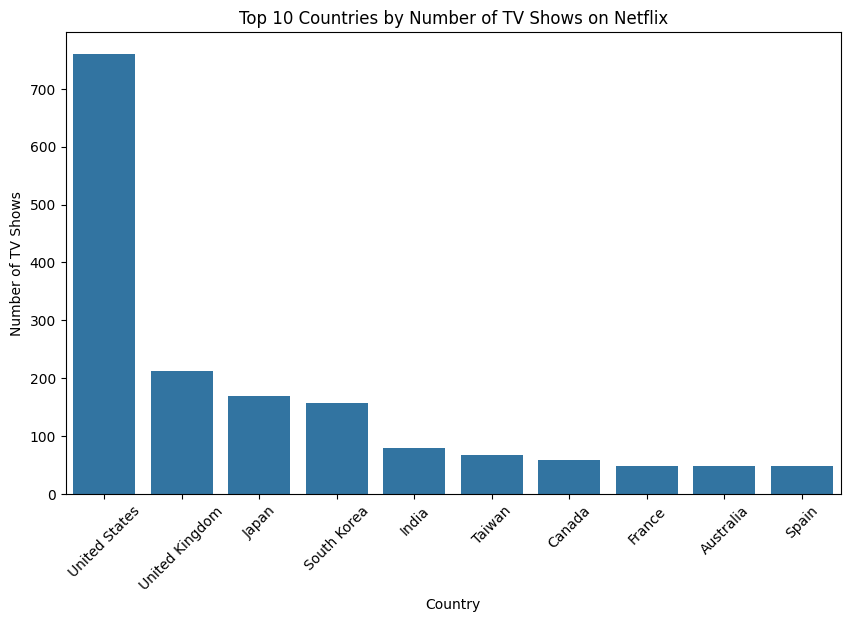

In [4]:
#Counting Countries that have the most appearances in the data 
def top_10_tv_shows():
    #Filter the dataset to include only TV Shows 
    tv_shows_df = movies_df[movies_df['type'] == 'TV Show']
    #Most present country count 
    top_country_counts = tv_shows_df['country'].value_counts().head(10)
    return top_country_counts

#Get the top 10 countries for TV Shows
top_10_tv_show_countries = top_10_tv_shows()

#Plotting directly from the Series
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_tv_show_countries.index, y=top_10_tv_show_countries.values)
plt.title('Top 10 Countries by Number of TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)  #Rotate the x labels for better readability (so they don't blend into each other) 
plt.show()

#The main conclusion we can draw is that the U.S. by far dominates the production of TV Shows on Netflix.
#This information is important as it shows Netflix where a majority of its content is coming from.
#If Netflix wants to try to penetrate other markets, it could target some of these countries and start accepting more global content outside of the U.S.
#This type of data really helps when looking at market expansion and penetrating other content production areas. 

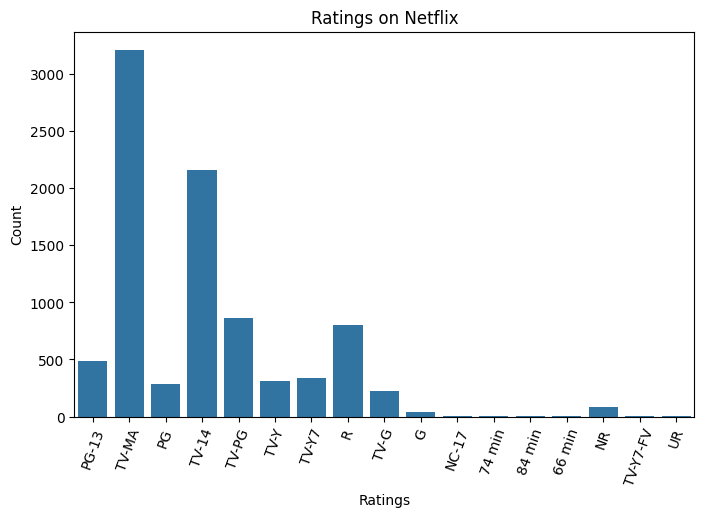

In [5]:
# Count plot for 'ratings'
movies_df_cleaned2 = movies_df.dropna(subset=['rating']) #getting rid of values that don't exist to avoid having empty column 
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=movies_df_cleaned2)

# Adding a title and labels
plt.title('Ratings on Netflix')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=70)  #Rotate the x labels for better readability (so they don't blend into each other)

# Show the plot
plt.show()

#The most common ratings are TV-MA and TV-14 which suggests TV Shows are the most digested type of content on the platform 
#Moving forwards, this helps Netflix make strategic acquistion decisions so that it can accurately invest in the right content moving forwards
#Regarding its algorithm, the platform would most likely recommend this TV-MA and TV-14 content as its baseline recommendations 
#Ideally, the individual inputted user preferences would alter what shows up on someone's homepage making it unique to that user 

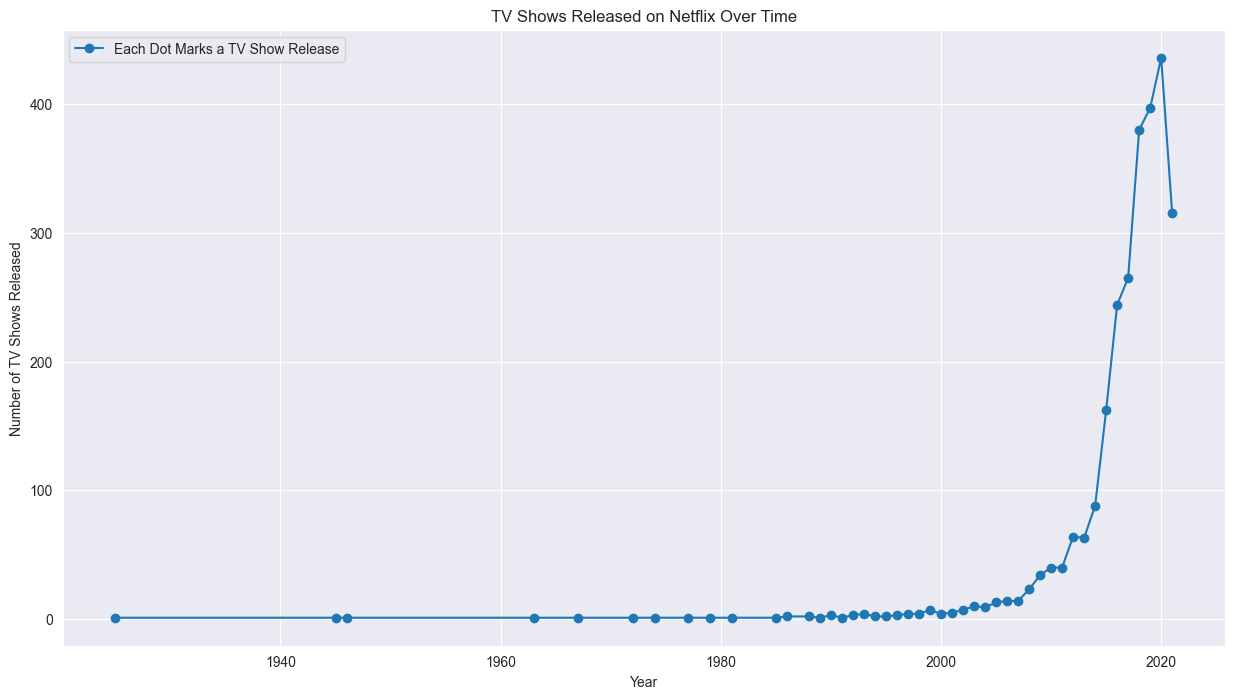

In [6]:
tv_shows_df2 = movies_df_clean[movies_df_clean['type'] == 'TV Show']
#Most present country count 
show_count = tv_shows_df2['show_id'].value_counts()

#Group by 'release_year' and count the number of TV shows released each year to avoid sizing issues when creating graph 
shows_per_year = tv_shows_df2.groupby('release_year')['show_id'].count()

#Extract the years and the corresponding number of shows released and create indexes 
years = shows_per_year.index
number_shows = shows_per_year.values

sns.set_style('darkgrid')  #Set the style for the plot
plt.figure(figsize=(15, 8))  #Adjust the figure size
plt.plot(years, number_shows, marker='o')  #Add markers to the line
plt.xlabel('Year')
plt.ylabel('Number of TV Shows Released')
plt.title('TV Shows Released on Netflix Over Time')
plt.legend(['Each Dot Marks a TV Show Release'])

plt.show()

#The bigges insight that can be derived is the huge increase in production of TV shows -- however importantly there has been a marked decrease right before 2020
#This could be due to COVID-19 -- however compared to content consumption above with the ratings tracking we can assume TV shows are still the most popular
#Moving forwards, Netflix, based of this data, should continue to invest in increasing its TV Show offerings and investments within the production of these shows

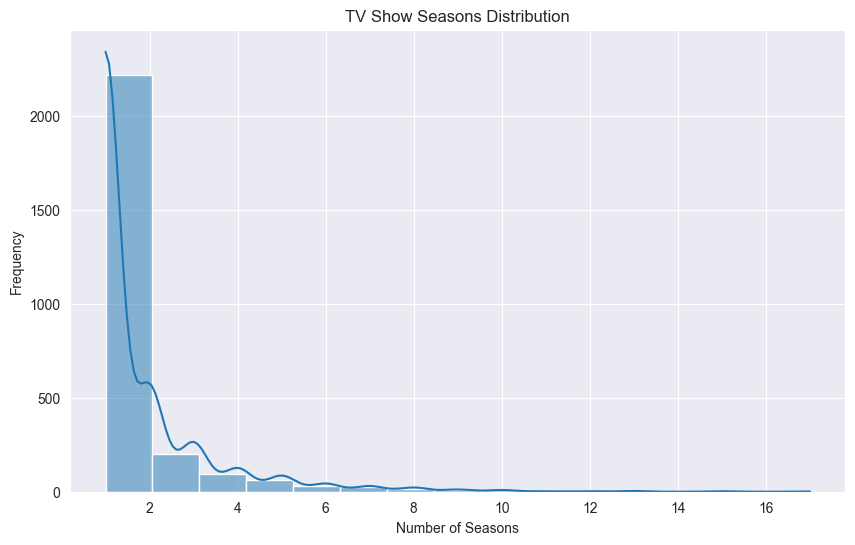

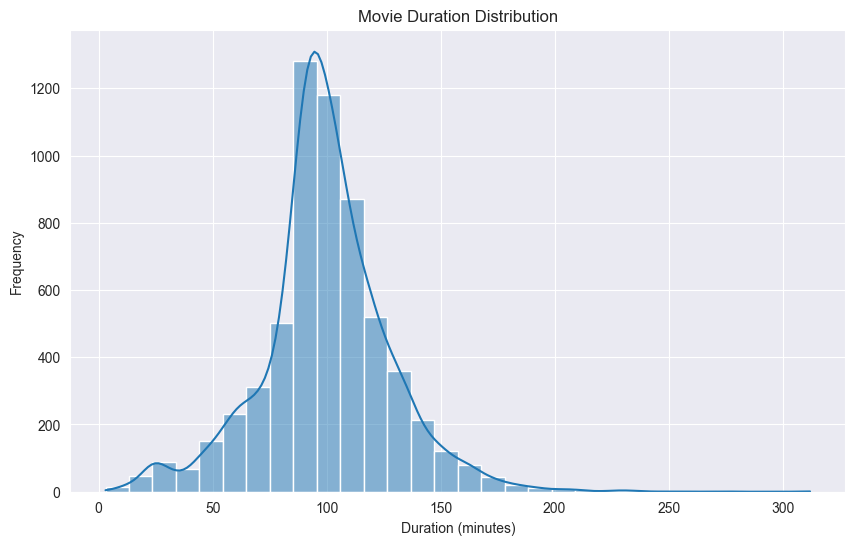

In [7]:
#Separate Movies and TV Shows
movies_df = movies_df_clean[movies_df_clean['type'] == 'Movie']
tv_shows_df = movies_df_clean[movies_df_clean['type'] == 'TV Show'].copy()  # Explicitly create a copy to avoid SettingWithCopyWarning

#Extract the number of seasons from the 'duration' column for TV shows -- using loc to avoid overwriting data and messing up within a view 
tv_shows_df.loc[:, 'seasons'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(float)

#Plot distribution for TV shows (number of seasons)
plt.figure(figsize=(10, 6))
sns.histplot(tv_shows_df['seasons'], bins=15, kde=True)
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

# --- Plot 1: Movie Duration (in minutes) ---

#Step 1: Replace or drop 'Information Not Provided' entries
movies_df_noNA = movies_df[movies_df['duration'] != 'Information Not Provided'].copy()  #Remove rows with 'Information Not Provided' from my earlier dataframe

#Step 2: Convert movie durations to numeric (strip 'min' and convert to float)
movies_df_noNA.loc[:, 'duration'] = movies_df_noNA['duration'].str.replace(' min', '').astype(float) #I am using loc here as I was getting warnings from the kernel to not mess up the orignal datafram by editing a slice -- used google a lot to help me with this 

#Plot distribution for movies (duration in minutes)
plt.figure(figsize=(10, 6))
sns.histplot(movies_df_noNA['duration'], bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

#TV Shows and Movies vary drastically in duration, as shows have seasons and episodes whilst movies only have one "episode" in minutes. 
#Shows keep users longer on the application and can be easier to produce due to it being a longer project. 
#With this mindset, users would arguably be more engaged watching seasons of a TV show rather than multiple movies
#Without drawing an unbased conclusion, I can safely assume that users who view TV shows expect more content and episodes whilst users who view movies expect the opposite 